86.98970004336019


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


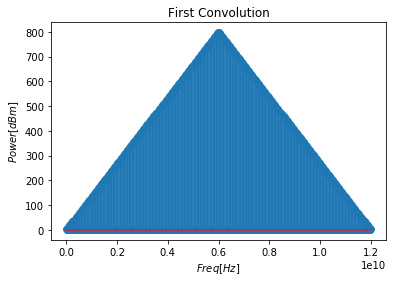

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


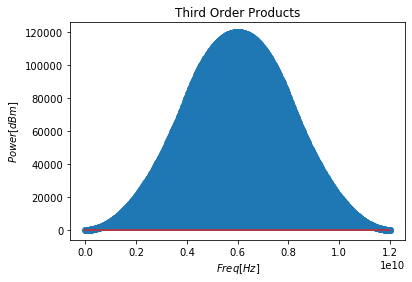

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


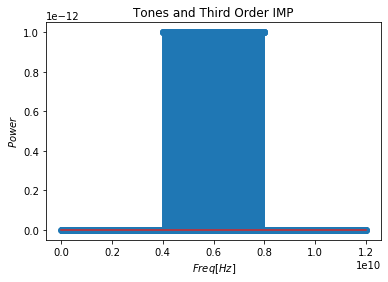

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#variables
Nton=400
Z0=50
f1=4e9
fn=8e9
PtondBm=-90
G=39
Pip3=-45
Aton=(1e-3)*10**(PtondBm/10)
A3=(1e-3)*10**((3*PtondBm-2*Pip3)/10)
fton=np.linspace(f1,fn,Nton) ## 
Avec=np.ones(Nton)

#Compute third order harmonics frequencies for all tones
conv1=np.convolve(Avec,Avec) #(Nton-1)
x=np.copy(conv1)

for i in range(len(x)):
    x[i]=conv1[i]*(-1)**(i)

conv1=x+conv1
conv2=np.convolve(conv1,Avec) #(3*Nton-2)

#freq compute
f1=np.linspace(0,12e9,2*Nton-1) ## 
f2=np.linspace(0,12e9,3*Nton-2) ## 

#merge all components    
f=np.append([fton],[f2])
A=np.append([Aton*Avec],[A3*conv2])

#SNR due TOI 
SNR=10*np.log10(np.min(Aton)/np.mn(A3*conv2))
print(SNR)
        
#ploting
c1 = plt.stem(f1,conv1)
#plt.axis([-2e9, 14e9,-60,40])
plt.xlabel("$Freq [Hz]$")
plt.ylabel("$Power [dBm]$")
plt.title("First Convolution")
plt.savefig('tones.pdf')
plt.show()

c2 = plt.stem(f2,conv2)
#plt.axis([-2e9, 14e9,-140,40])
plt.xlabel("$Freq [Hz]$")
plt.ylabel("$Power [dBm]$")
plt.title("Third Order Products")
plt.savefig('tones.pdf')
plt.show()

c3 = plt.stem(f,A)
#plt.axis([-2e9, 14e9,-140,40])
plt.xlabel("$Freq [Hz]$")
plt.ylabel("$Power$")
plt.title("Tones and Third Order IMP")
plt.savefig('tones.pdf')
plt.show()

c3 = plt.stem(f,10*np.log10(A/1e-3))
#plt.axis([-2e9, 14e9,-140,40])
plt.xlabel("$Freq [Hz]$")
plt.ylabel("$Power [dBm]$")
plt.title("Tones and Third Order IMP")
plt.savefig('tones.pdf')
plt.show()
